
# <font color='blue'>Sistema de Recomendação por Similaridade com IA e BERTopic</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [2]:
# Pré-requisito para o bertopic
!pip install -q umap

  Preparing metadata (setup.py) ... done


In [3]:
# https://pypi.org/project/bertopic/
!pip install -q bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 89.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
# Imports
import sklearn
import numba
import bertopic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
# Importação do dataset utilizado neste case
import warnings
warnings.filterwarnings('ignore')

In [5]:
%%time

# Carregando os dados
data = fetch_20newsgroups(subset = 'all')['data']

# Criando o modelo
topic_model = BERTopic(language = "english")

# Treinando e aplicando o modelo
topics, probabilities = topic_model.fit_transform(data)

print("\nResultado da Modelagem de Tópicos\n")

# Exibindo os 5 primeiros tópicos
for i, topic in enumerate(topic_model.get_topic_freq().Topic.values[:5]):
    print("Nome do Tópico:", topic_model.get_topic_info()['Name'][i])
    print("ID do Tópico:", topic)
    print(f"Palavras do Tópico {topic}:")
    print(", ".join([word[0] for word in topic_model.get_topic(topic)]), "\n")

# Mapa de Distância Intertópico
topic_model.visualize_topics()

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]


Resultado da Modelagem de Tópicos

Nome do Tópico: -1_the_and_to_of
ID do Tópico: -1
Palavras do Tópico -1:
the, and, to, of, in, for, is, from, it, this 

Nome do Tópico: 0_clayton_cramer_gay_homosexual
ID do Tópico: 0
Palavras do Tópico 0:
clayton, cramer, gay, homosexual, sexual, homosexuals, men, sex, crameroptilinkcom, study 

Nome do Tópico: 1_address_email_mailing_please
ID do Tópico: 1
Palavras do Tópico 1:
address, email, mailing, please, internet, list, organization, lines, subject, mail 

Nome do Tópico: 2_gun_militia_guns_amendment
ID do Tópico: 2
Palavras do Tópico 2:
gun, militia, guns, amendment, firearms, arms, control, firearm, crime, bear 

Nome do Tópico: 3_atheists_atheism_god_atheist
ID do Tópico: 3
Palavras do Tópico 3:
atheists, atheism, god, atheist, faith, religion, beliefs, belief, exist, existence 

CPU times: user 2min 50s, sys: 5.52 s, total: 2min 55s
Wall time: 2min 58s


## Carregando o Conjunto de Dados de Texto

In [6]:
# Carrega os dados
dados = pd.read_csv("dataset.csv")

In [7]:
dados.shape

(20000, 2)

In [8]:
dados.head()

,publish_date,headline_text
0,20050627,lawyer claims aust govt has abandoned corby
1,20051206,singapore tells spouses of patients hiv status
2,20141119,iron ore price slumps to new five year low
3,20060203,youth crime prevention schemes share in funds
4,20190521,harry triguboff speaks to the business


## Visualizando a Distribuição dos Dados de Texto

In [9]:
# Cria uma nova coluna contendo o comprimento (número de palavras) de cada texto (cada frase)
dados["headline_text_len"] = dados["headline_text"].apply(lambda x : len(x.split()))

In [10]:
dados.head()

,publish_date,headline_text,headline_text_len
0,20050627,lawyer claims aust govt has abandoned corby,7
1,20051206,singapore tells spouses of patients hiv status,7
2,20141119,iron ore price slumps to new five year low,9
3,20060203,youth crime prevention schemes share in funds,7
4,20190521,harry triguboff speaks to the business,6


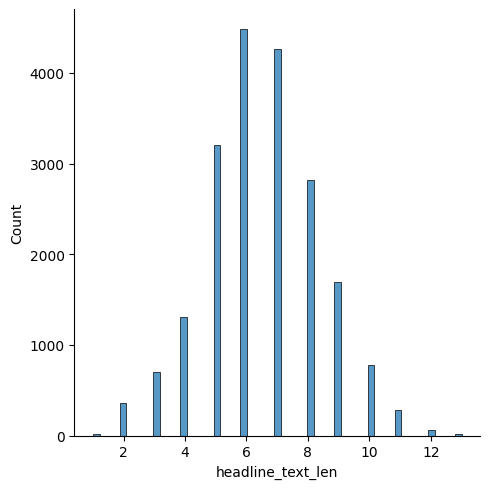

In [11]:
# Visualiza a distribuição de comprimento
sns.displot(dados.headline_text_len, kde = False)

In [12]:
# Vamos dar uma olhada em 5 registros de forma aleatória
for idx in dados.sample(5).index:
    headline = dados.iloc[idx]
    print("Headline (Manchete) #{}:".format(idx))
    print("Data de Publicação: {}".format(headline.publish_date))
    print("Texto: {}\n".format(headline.headline_text))

Headline (Manchete) #2639:
Data de Publicação: 20050506
Texto: police link aust arrests to bali nine

Headline (Manchete) #8338:
Data de Publicação: 20201207
Texto: second negative test for two travellers from germany

Headline (Manchete) #18716:
Data de Publicação: 20060207
Texto: nt judge expects murdoch appeal application

Headline (Manchete) #16338:
Data de Publicação: 20150728
Texto: kelly mcjannett katherine community garden

Headline (Manchete) #18119:
Data de Publicação: 20051119
Texto: nt police overhaul health and safety system



## Aplicando BERTopic Para Modelagem de Tópicos

### Treinamento


**BERTopic**: Essa é a classe principal da biblioteca BERTopic. Essa classe cuida do processo de modelagem de tópicos, que começa com a transformação dos documentos e sentenças em embeddings e termina com a redução de dimensionalidade para a visualização dos tópicos.

**embedding_model = 'paraphrase-MiniLM-L3-v2'**: Esse parâmetro define o modelo de embedding a ser usado para transformar os documentos em vetores de recursos numéricos. Neste caso, estamos usando o modelo 'paraphrase-MiniLM-L3-v2' que é um modelo Transformer treinado para criar vetores semelhantes para textos que têm o mesmo significado. Este modelo é geralmente muito bom para a tarefa de modelagem de tópicos, já que textos com tópicos semelhantes terão vetores semelhantes. Link da página do modelo:

https://huggingface.co/sentence-transformers/paraphrase-MiniLM-L3-v2

**min_topic_size = 50**: Este é um parâmetro que define o tamanho mínimo que um tópico deve ter para não ser considerado como ruído. Nesse caso, qualquer tópico que tenha menos de 50 documentos será classificado como tópico de ruído e seus documentos serão reatribuídos a outros tópicos.

**verbose = True**: Esse é um parâmetro que define se a biblioteca deve imprimir mensagens informativas durante o processo de modelagem de tópicos. Se for definido como True, você verá mensagens sobre o progresso do treinamento do modelo, o que pode ser útil para entender o que está acontecendo e para solucionar problemas se algo der errado.

In [13]:
# Cria o modelo BERTopic definindo o modelo de embedding
modelo_bertopic = BERTopic(embedding_model = 'paraphrase-MiniLM-L3-v2', min_topic_size = 50, verbose = True)

In [14]:
# Aplica o modelo ao conjunto de dados de texto
topicos_finais, _ = modelo_bertopic.fit_transform(dados.headline_text)

.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-11-19 21:37:02,464 - BERTopic - Transformed documents to Embeddings
2023-11-19 21:37:21,103 - BERTopic - Reduced dimensionality
2023-11-19 21:37:22,794 - BERTopic - Clustered reduced embeddings


### Salvando e Carregando o Modelo

In [15]:
# Salva o modelo
modelo_bertopic.save("modelo_bertopic")

In [16]:
# Carrega o modelo
modelo = BERTopic.load("modelo_bertopic")

In [17]:
modelo.get_params()

{'calculate_probabilities': False,
 'ctfidf_model': ClassTfidfTransformer(),
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x78c3e9d97dc0>,
 'hdbscan_model': HDBSCAN(min_cluster_size=50, prediction_data=True),
 'language': None,
 'low_memory': False,
 'min_topic_size': 50,
 'n_gram_range': (1, 1),
 'nr_topics': None,
 'representation_model': None,
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': UMAP(angular_rp_forest=True, low_memory=False, metric='cosine', min_dist=0.0, n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 'vectorizer_model': CountVectorizer(),
 'verbose': True}

## Extração de Tópicos e Representação

In [18]:
# Vamos extrair quantos tópicos foram encontrados
info_topics = modelo.get_topic_info()

In [19]:
print("Número de Tópicos: {}".format(len(info_topics)))

Número de Tópicos: 52


In [20]:
info_topics.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10155,-1_to_for_in_of,"[to, for, in, of, on, the, over, new, with, af...",[road crash rescue times set to improve in sou...
1,0,1401,0_police_man_murder_charged,"[police, man, murder, charged, over, sex, cour...","[man in court on sexual assault charges, man t..."
2,1,1009,1_cup_win_test_tigers,"[cup, win, test, tigers, world, australia, aus...",[australia vs south africa second test day fou...
3,2,510,2_interview_speaks_smith_extended,"[interview, speaks, smith, extended, with, med...","[interview steve smith, extended interview, in..."
4,3,440,3_fire_bushfire_fires_firefighters,"[fire, bushfire, fires, firefighters, house, b...",[nsw fire crews fighting blaze on central coas...


A tabela acima possui as 3 primeiras colunas fornecendo informações sobre todos os tópicos em ordem decrescente de tamanho/Contagem de tópicos.

- '**Topic**' é o número do tópico, um tipo de identificador e os outliers são rotulados como -1. Esses são tópicos que devem ser ignorados porque não trazem nenhum valor agregado.
- '**Contagem**' é o número de palavras no tópico.
- **Nome** é o nome dado ao tópico.

Para cada tópico podemos recuperar as principais palavras e sua pontuação c-TF-IDF correspondente. Quanto maior a pontuação, mais relevante é a palavra na representação do tópico.

In [21]:
# Obtemos um tópico
id_topic = info_topics.iloc[1]["Topic"]

In [22]:
# ESTE É O ID DO TÓPICO E NÃO O ÍNDICE DA TABELA.
id_topic

0

In [23]:
# Mostra as palavras e suas pontuações c-TF-IDF
modelo.get_topic(id_topic)

[('police', 0.050843396220986596),
 ('man', 0.04601270041971955),
 ('murder', 0.03986133383796952),
 ('charged', 0.03650907282910286),
 ('over', 0.033718291892301404),
 ('sex', 0.02576114368709006),
 ('court', 0.025663197474761573),
 ('drug', 0.024470754421952776),
 ('jailed', 0.02301240158894021),
 ('assault', 0.022635170473867712)]

## Visualização dos Termos Mais Importantes de Cada Tópico

A visualização dos termos mais importantes em cada tópico ajuda a obter mais informações sobre cada tópico. O BERTopic fornece várias possibilidades de visualização, como visualização de termos, mapa de distância intertópico, agrupamento de hierarquia de tópicos, apenas para citar alguns. Vamos então criar algumas visualizações.

### Visualização da Importância dos Termos dos Tópicos

As palavras mais relevantes de cada tópico podem ser visualizadas em forma de gráfico de barras a partir da pontuação c-TF-IDF, o que é interessante para comparar visualmente os tópicos.

In [24]:
# Os 6 termos mais importantes dos 8 primeiros tópicos (não considera o tópico de outliers)
modelo.visualize_barchart(title = 'Palavras Mais Importantes Por Tópico', top_n_topics = 8, n_words = 6)

## Mapa de Distância Intertópico (Intertopic Distance Map)

https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html

Um Mapa de Distância Intertópico (Intertopic Distance Map) é uma visualização utilizada em análise de tópicos, um subcampo de Machine Learning, e especificamente quando se utiliza o método de Latent Dirichlet Allocation (LDA) para modelagem de tópicos.

A análise de tópicos é uma forma de aprendizado não supervisionado que busca descobrir "tópicos" ou temas que estão presentes em uma coleção de documentos (ou outros tipos de dados textuais). O LDA é um dos algoritmos mais comumente usados para essa tarefa.

Um Mapa de Distância Intertópico é uma forma de visualizar os resultados de uma análise de tópicos. Cada "bolha" no mapa representa um tópico. O mapa é projetado de modo que tópicos que compartilham muitas palavras semelhantes estão próximos uns dos outros, enquanto tópicos que têm palavras distintas estão mais distantes uns dos outros. Isso permite que os pesquisadores vejam rapidamente quais tópicos são semelhantes e quais são distintos.

Além disso, a área de cada bolha no mapa é proporcional à prevalência desse tópico na coleção de documentos. Assim, tópicos maiores são mais comuns e tópicos menores são menos comuns.

Uma ferramenta popular para criar Mapas de Distância Intertópico é a biblioteca Python chamada PyLDAvis.

Tenha em mente que, como é uma técnica de aprendizado não supervisionado, a interpretação dos tópicos identificados pelo LDA (e, portanto, a interpretação do mapa de distância intertópico) pode ser bastante subjetiva e depende do conhecimento de domínio do pesquisador ou analista.

In [25]:
# Mapa de tópicos
modelo.visualize_topics()

## Visualizando a Hierarquia de Tópicos

https://maartengr.github.io/BERTopic/api/plotting/hierarchy.html

Como você pode ver no gráfico anterior, alguns tópicos são muito próximos. Uma coisa que pode vir à mente é como posso reduzir o número de tópicos? A boa notícia é que esses tópicos podem ser hierarquizados para selecionar o número apropriado de tópicos. A visualização abaixo ajuda a entender como eles se relacionam.

In [26]:
modelo.visualize_hierarchy(title = 'Hierarquia de Tópicos', top_n_topics = 30, orientation = 'bottom')

Olhando para o primeiro nível (nível 0) do dendrograma, podemos ver que os tópicos com as mesmas cores foram agrupados no mesmo nível de hierarquia, indicando similaridades entre os tópicos.

## Buscando Tópicos Similares

Depois que o modelo de mdoelagem de tópicos é treinado, podemos pesquisar tópicos que são semanticamente semelhantes a uma palavra/termo de consulta de entrada usando a função `find_topics`. No nosso caso, vamos pesquisar os 3 principais tópicos relacionados à palavra 'sports'.

In [27]:
# Selecionamos no máximo 3 tópicos cujas palavras têm maior similaridade ao termo de busca (sports)
# Aqui colocamos os termos de similiridade que queremos encontrar nos documentos e recomendar ao Usuário.
similar_topics, similarity = modelo.find_topics("sports", top_n = 3)

- **similar_topics** contém o índice de tópicos do mais semelhante ao menos semelhante.
- **similarity** contém as pontuações de similaridade em ordem decrescente.

In [28]:
# Aqui avaliamos a similaridade das palavras que foram encontradas.
# Scores de similaridade dos tópicos com termos de maior similaridade ao termo de busca
similarity

[0.42111617, 0.31847626, 0.31601006]

In [29]:
# IDs dos tópicos com termos de maior similaridade ao termo de busca
similar_topics

[1, 42, 35]

In [30]:
# Vamos extrair o primeiro com as palavras com maior similaridade ao termo de busca (sports) e recomedaremos
# para o usuário. Neste caso o indice 0.
mais_similar = similar_topics[0]

In [31]:
print("\nSimilarity Score do Tópico: {}".format(similarity[0]))
print("\nTermos do Tópico com Maior Similaridade ao Termo de Busca: \n\n{}".format(modelo.get_topic(mais_similar)))


Similarity Score do Tópico: 0.4211161732673645

Termos do Tópico com Maior Similaridade ao Termo de Busca: 

[('cup', 0.031165582890300338), ('win', 0.028550376826779644), ('test', 0.025572295501042803), ('tigers', 0.02485023046506268), ('world', 0.02361403410847048), ('australia', 0.023571641291594315), ('aussies', 0.02144873980614046), ('england', 0.01941606333291861), ('final', 0.018262545504779015), ('eagles', 0.016849623536746634)]


# Fim